In [7]:
from mplbasketball import Court
import pandas as pd
import numpy
import os

In [22]:
# Calculate the minimum and maximum values for shotX and shotY
min_shotX = data['shotX'].min()
max_shotX = data['shotX'].max()
min_shotY = data['shotY'].min()
max_shotY = data['shotY'].max()

print(f"Minimum shotX: {min_shotX}")
print(f"Maximum shotX: {max_shotX}")
print(f"Minimum shotY: {min_shotY}")
print(f"Maximum shotY: {max_shotY}")


Minimum shotX: -0.6
Maximum shotX: 48.5
Minimum shotY: -0.6
Maximum shotY: 44.3


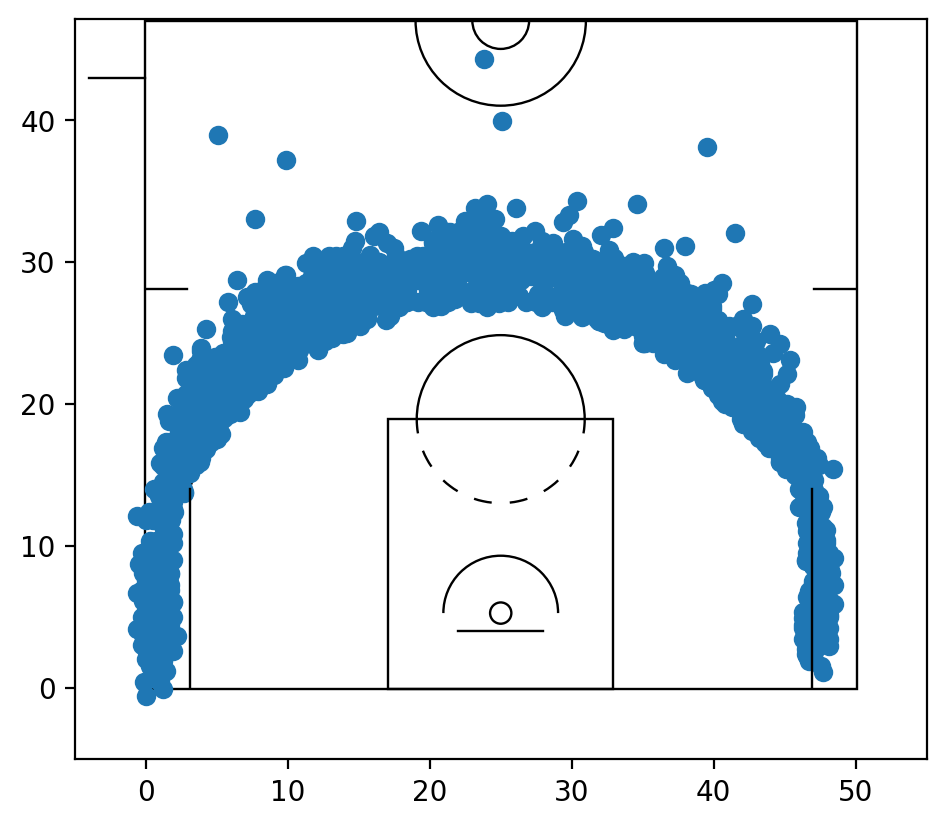

In [37]:

file_path = os.getenv('OUTPUT_FILE')

data = pd.read_csv(file_path)
x = data['shotX']
y = data['shotY']

court = Court(court_type="nba", origin="top-left", units="ft")
fig, ax = court.draw(showaxis=True, orientation="vd")
ax.scatter(x, y)